In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit

import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [15]:
T1 = np.array([[0., 0., 0., 1.], 
               [1., 0., 0., 0.], 
               [0., 1., 0., 0.], 
               [0., 0., 1., 0.]])

In [16]:
eigvals1, eigvecs1 = np.linalg.eig(T1)

In [17]:
print(eigvals1)

[-1.00000000e+00+0.j  5.55111512e-17+1.j  5.55111512e-17-1.j
  1.00000000e+00+0.j]


In [18]:
print(eigvecs1)

[[-5.00000000e-01+0.0000000e+00j  5.00000000e-01+0.0000000e+00j
   5.00000000e-01-0.0000000e+00j -5.00000000e-01+0.0000000e+00j]
 [ 5.00000000e-01+0.0000000e+00j -6.24500451e-17-5.0000000e-01j
  -6.24500451e-17+5.0000000e-01j -5.00000000e-01+0.0000000e+00j]
 [-5.00000000e-01+0.0000000e+00j -5.00000000e-01-6.9388939e-17j
  -5.00000000e-01+6.9388939e-17j -5.00000000e-01+0.0000000e+00j]
 [ 5.00000000e-01+0.0000000e+00j -2.01227923e-16+5.0000000e-01j
  -2.01227923e-16-5.0000000e-01j -5.00000000e-01+0.0000000e+00j]]


In [62]:
print(eigvecs1[eigvals1.argmax()])

[ 5.00000000e-01+0.j  -2.01227923e-16+0.5j -2.01227923e-16-0.5j
 -5.00000000e-01+0.j ]


In [19]:
spectrum1 = np.zeros([len(eigvals1), 2])
spectrum1[:, 0] = np.real(eigvals1)
spectrum1[:, 1] = np.imag(eigvals1)

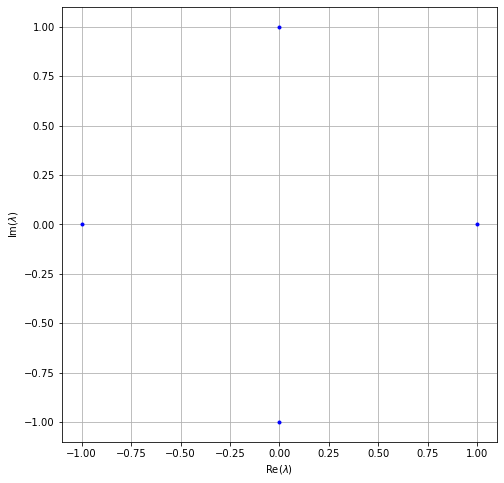

In [21]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(spectrum1[:, 0], spectrum1[:, 1], 'b.')
ax1.set_xlabel(r'Re($\lambda$)')
ax1.set_ylabel(r'Im($\lambda$)')
ax1.grid(True)
ax1.set_aspect('equal')
plt.show()

In [22]:
T2 = np.array([[0., 0., 0., 1.], 
               [1/3., 0., 0., 0.], 
               [1/3., 1., 0., 0.], 
               [1/3., 0., 1., 0.]])

In [23]:
eigvals2, eigvecs2 = np.linalg.eig(T2)

In [24]:
print(eigvals2)

[ 1.        +0.j         -0.71805717+0.j         -0.14097142+0.66659032j
 -0.14097142-0.66659032j]


In [25]:
print(eigvecs2)

[[ 0.62554324+0.j          0.75285378+0.j         -0.65750284+0.j
  -0.65750284-0.j        ]
 [ 0.20851441+0.j         -0.34948647+0.j          0.06655608+0.3147137j
   0.06655608-0.3147137j ]
 [ 0.41702883+0.j          0.13722474+0.j          0.49825765+0.12357132j
   0.49825765-0.12357132j]
 [ 0.62554324+0.j         -0.54059205+0.j          0.09268911-0.43828503j
   0.09268911+0.43828503j]]


In [26]:
spectrum2 = np.zeros([len(eigvals2), 2])
spectrum2[:, 0] = np.real(eigvals2)
spectrum2[:, 1] = np.imag(eigvals2)

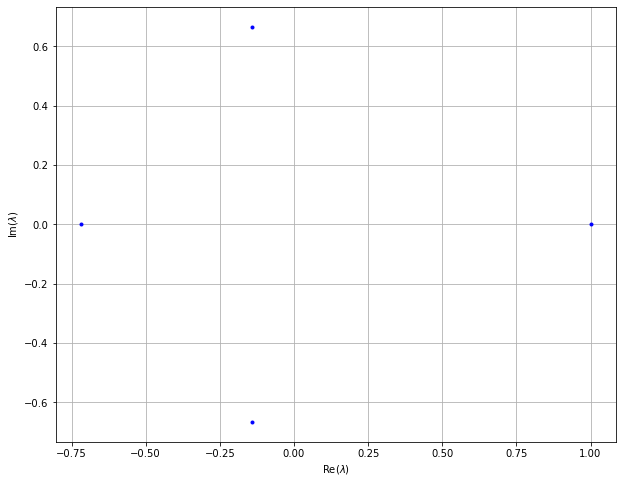

In [27]:
fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.plot(spectrum2[:, 0], spectrum2[:, 1], 'b.')
ax2.set_xlabel(r'Re($\lambda$)')
ax2.set_ylabel(r'Im($\lambda$)')
ax2.grid(True)
ax2.set_aspect('equal')
plt.show()

In [52]:
T3 = np.array([[0., 0., 0., 1.], 
               [1/2., 0., 0., 0.], 
               [0., 1., 0., 0.], 
               [1/2., 0., 1., 0.]])

In [53]:
eigvals3, eigvecs3 = np.linalg.eig(T3)

In [54]:
spectrum3 = np.zeros([len(eigvals3), 2])
spectrum3[:, 0] = np.real(eigvals3)
spectrum3[:, 1] = np.imag(eigvals3)

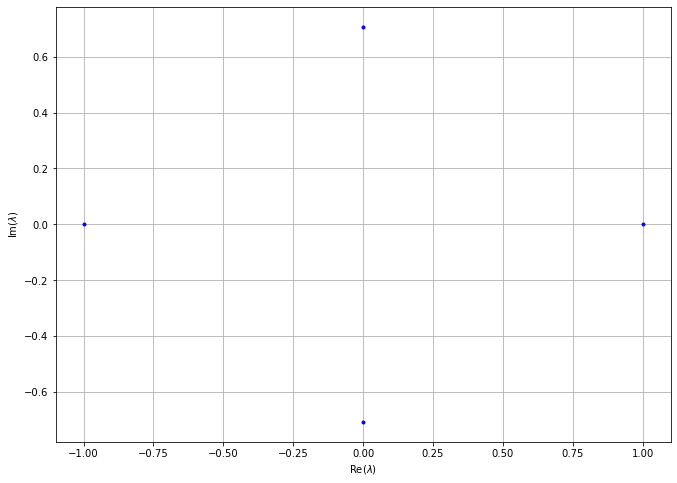

In [55]:
fig3, ax3 = plt.subplots(figsize=(12,8))
ax3.plot(spectrum3[:, 0], spectrum3[:, 1], 'b.')
ax3.set_xlabel(r'Re($\lambda$)')
ax3.set_ylabel(r'Im($\lambda$)')
ax3.grid(True)
ax3.set_aspect('equal')
plt.show()

In [59]:
A = T3 - np.eye(4)
A[3] = [1,1,1,1]
print(A)

[[-1.   0.   0.   1. ]
 [ 0.5 -1.   0.   0. ]
 [ 0.   1.  -1.   0. ]
 [ 1.   1.   1.   1. ]]


In [60]:
ps = np.linalg.solve(A, [0,0,0,1])
print(ps)

[0.33333333 0.16666667 0.16666667 0.33333333]


In [58]:
powers = [10, 50, 100, 500, 1000, 2000, 5000, 10000]
k = np.array(powers, dtype=np.float64)
Tk = []
for power in powers:
    Tk.append(np.linalg.matrix_power(T3, power))
    print(np.linalg.matrix_power(T3, power))

[[0.65625 0.      0.6875  0.     ]
 [0.      0.3125  0.      0.34375]
 [0.34375 0.      0.3125  0.     ]
 [0.      0.6875  0.      0.65625]]
[[0.66666666 0.         0.66666669 0.        ]
 [0.         0.33333331 0.         0.33333334]
 [0.33333334 0.         0.33333331 0.        ]
 [0.         0.66666669 0.         0.66666666]]
[[0.66666667 0.         0.66666667 0.        ]
 [0.         0.33333333 0.         0.33333333]
 [0.33333333 0.         0.33333333 0.        ]
 [0.         0.66666667 0.         0.66666667]]
[[0.66666667 0.         0.66666667 0.        ]
 [0.         0.33333333 0.         0.33333333]
 [0.33333333 0.         0.33333333 0.        ]
 [0.         0.66666667 0.         0.66666667]]
[[0.66666667 0.         0.66666667 0.        ]
 [0.         0.33333333 0.         0.33333333]
 [0.33333333 0.         0.33333333 0.        ]
 [0.         0.66666667 0.         0.66666667]]
[[0.66666667 0.         0.66666667 0.        ]
 [0.         0.33333333 0.         0.33333333]
 [0.33333